<a href="https://colab.research.google.com/github/JuanGarcia88/Maquinas_II/blob/main/Taller_1B_MAQUINAS_ASINCRONASJD_DEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

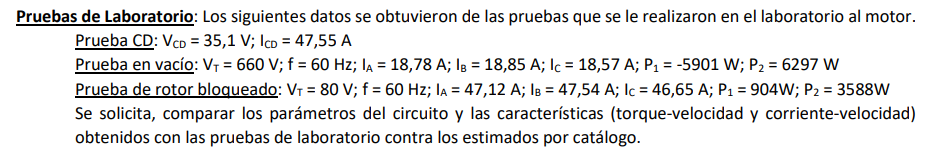

In [90]:
Vcd = 35.1
Icd = 47.55

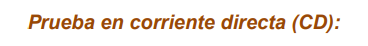

image.png

In [91]:
Re = Vcd/ (2* Icd)
print(Re)

0.3690851735015773


image.png

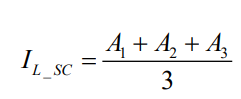

In [92]:
A1 = 47.12
A2 = 47.54
A3 = 18.57

In [93]:
IL_SC = (A1+A2+A3)/3
print(IL_SC)

37.74333333333333


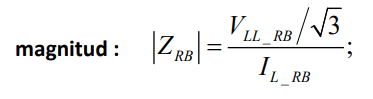

In [94]:
ZRB01 = (660 / (3**0.5))/IL_SC
print(ZRB01)

10.095853863776906


image.png

In [95]:
P3_SC = -5901 + 6297
P3_SC

396

In [96]:
Pcu_E = 3 * ((IL_SC**2) * Re)
Pcu_E

1577.3510507886435

In [97]:
Prot = P3_SC - Pcu_E
Prot

-1181.3510507886435

image.png

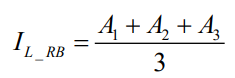

In [98]:
A01=47.12
A02=47.54
A03=46.65

In [99]:
IL_RB = (A01+A02+A03)/3
IL_RB

47.10333333333333

In [100]:
P3_RB = 904 + 3588

In [101]:
S3_BR = (3**0.5) * (80) * IL_RB
S3_BR

6526.829323134881

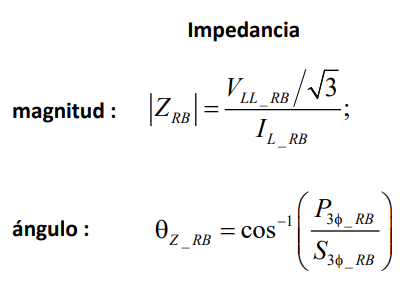

In [102]:
ZRB = (80 / (3**0.5))/IL_RB
ZRB

0.9805680037188466

In [103]:
import numpy as np

theta_z_RB = np.arccos((P3_RB/S3_BR))
z=np.degrees(theta_z_RB)
z

46.50935207855179

In [104]:
Rrb = ZRB*(np.cos(theta_z_RB))
print(Rrb)

0.6748623649606094


In [105]:
Rr = Rrb - Re
print(Rr)

0.30577719145903204


In [106]:
Xrb = ZRB*(np.sin(theta_z_RB))
Xrb

0.711389062522708

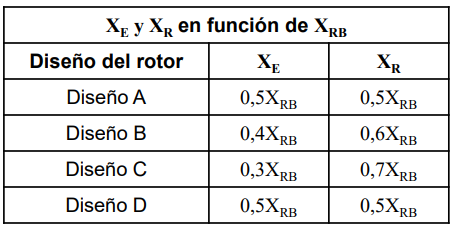

In [107]:
## diseño B
Xe = 0.4 * Xrb
Xr = 0.6 * Xrb

print(Xe)
print(Xr)

0.2845556250090832
0.42683343751362474


In [108]:
Xm = ZRB01 - Xe
print(Xm)

9.811298238767822


### Los valores obtenidos son:

**Re =** 0.3690851735015773

**Xe =** 0.2845556250090832

**Xm =** 9.811298238767822

**Rr =** 0.30577719145903204

**Xr =** 0.42683343751362474

In [109]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cmath

In [110]:
Sn = (900 - (880) ) / 900

In [111]:
pp=(1j*Xm*((Rr)+1j*Xr))/(1j*Xm+((Rr)+1j*Xr))
Zeq_ST=Re+1j*Xe+(pp)
r, theta = abs(Zeq_ST), cmath.phase(Zeq_ST)
print(Zeq_ST)
print(f"Forma polar: {r}∠{theta} ")

(0.6496475288997323+0.7019735541697296j)
Forma polar: 0.9564563673054881∠0.8240923717186288 


In [112]:
pp=(1j*Xm*((Rr/Sn)+1j*Xr))/(1j*Xm+((Rr/Sn)+1j*Xr))
Zeq_N=Re+1j*Xe+(pp)
r1, theta1 = abs(Zeq_N), cmath.phase(Zeq_N)
print(Zeq_N)
print(f"Forma polar: {r1}∠{theta1} ")

(4.871987518820434+6.745461746428965j)
Forma polar: 8.320908397289239∠0.9452854541983897 


In [113]:
pp=(1j*Xm*((Rr/0.0000001)+1j*Xr))/(1j*Xm+((Rr/0.0000001)+1j*Xr))
Zeq_V=Re+1j*Xe+(pp)
r2, theta2 = abs(Zeq_V), cmath.phase(Zeq_V)
print(Zeq_V)
print(f"Forma polar: {r2}∠{theta2} ")

(0.369116654454316+10.0958538636715j)
Forma polar: 10.102599286382011∠1.534251392368591 


In [114]:
Ie_star = 380/r
print(Ie_star)

397.29988004631014


In [115]:
Ie_nominal = 380/r1
print(Ie_nominal)

45.668090772853034


In [116]:
Ie_vacio = 380/r2
print(Ie_vacio)

37.61408220082807


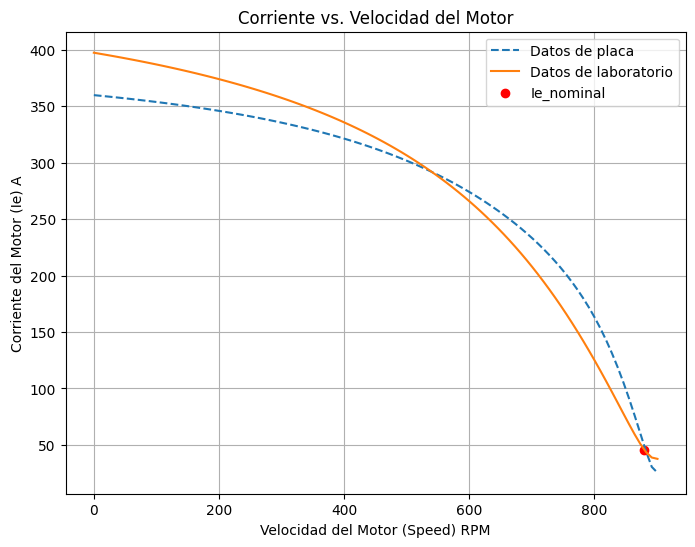

In [117]:
Speed = np.linspace(0, 901, 100)
Sn_plot=(900-Speed)/900
f=60
Rs = 0.1729
Xs = (2*np.pi*f)*(1.3856*(10**-3))
Xm1 = (2*np.pi*f)*(38.4525*(10**-3))
R1 = 0.3928
X1 = (2*np.pi*f)*(6.5173*(10**-3))
R2 = 0.3928
X2 = (2*np.pi*f)*((1.3856*10**-3))
Rr_plot= (R1*R2*(R1+R2)+(Sn_plot**2)*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+(Sn_plot)**2*(X1+X2)**2)
Xr_plot = (R1**2 * X2 + R2**2 * X1 + (Sn_plot**2) * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + (Sn_plot**2) * (X1 + X2)**2)

pp0=(1j*Xm1*((Rr_plot/Sn_plot)+1j*Xr_plot))/(1j*Xm1+((Rr_plot/Sn_plot)+1j*Xr_plot))

Zeq_plot=Rs+1j*Xs+(pp0)
r_plot = abs(Zeq_plot)
Ie = 380/r_plot

pp01=(1j*Xm*((Rr/Sn_plot)+1j*Xr))/(1j*Xm+((Rr/Sn_plot)+1j*Xr))
Zeq_N0=Re+1j*Xe+(pp01)
r_plot0 = abs(Zeq_N0)
Ie0 = 380/r_plot0


y2=Ie_nominal
plt.figure(figsize=(8, 6))
plt.plot(Speed, Ie, linestyle='--', label='Datos de placa')
plt.plot(Speed, Ie0, label='Datos de laboratorio')
plt.xlabel('Velocidad del Motor (Speed) RPM')
plt.ylabel('Corriente del Motor (Ie) A')
plt.title('Corriente vs. Velocidad del Motor')
plt.scatter(880, Ie_nominal , marker= 'o', color='red', label='Ie_nominal')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [118]:
Vth = 380*(((Xm)/((Re**2)+((Xe+Xm)**2))**0.5))
print(Vth)

369.04302046094534


In [119]:
Zth = (((complex(0, Xm))*(Re + complex(0, Xs))/(Re + (complex(0, Xe)+ complex(0, Xm)))))
Rth = Zth.real
Xth = Zth.imag

In [120]:
Ir_st = ((Vth)/(((Rth+(((Rr/1))))**2+((Xth+Xr))**2))**0.5)
print(Ir_st)

322.0415893051296


In [121]:
Ir_n =  ((Vth)/(((Rth+(((Rr/Sn))))**2+((Xth+Xr))**2))**0.5)
print(Ir_n)

26.1151012750767


In [122]:
Ws = ((2*np.pi)/60)*900
print(Ws)

94.24777960769379


In [123]:
Te_ST = (((3*(Vth**2))*(Rr/1))/((Ws*((Rth + (Rr/1))**2+((Xth + Xr)**2)))))
print(Te_ST)

1009.4368090377994


In [124]:
Te_N = (((3*(Vth**2))*(Rr/Sn))/((Ws*((Rth + (Rr/Sn))**2+((Xth + Xr)**2)))))
print(Te_N)

298.710959748176


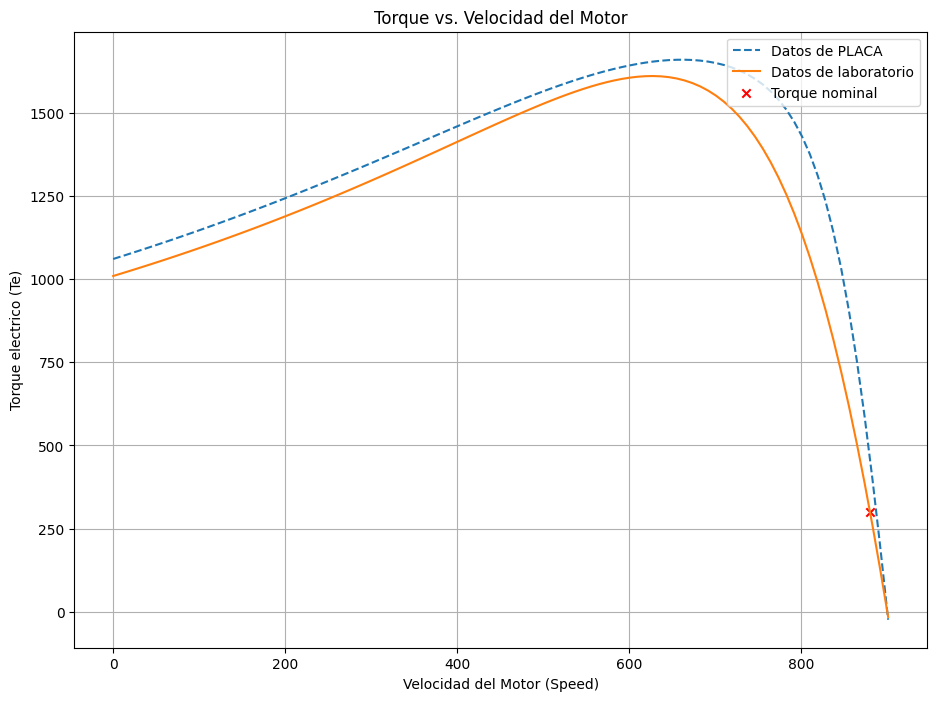

In [134]:
Speed = np.linspace(0, 901, 100)
Sn_plot=(900-Speed)/900

Rr_plot= (R1*R2*(R1+R2)+(Sn_plot**2)*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+(Sn_plot)**2*(X1+X2)**2)
Xr_plot = (R1**2 * X2 + R2**2 * X1 + (Sn_plot**2) * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + (Sn_plot**2) * (X1 + X2)**2)
Vth0 = 366.75900203560786
Rth0 = 0.16106061930589613
Xth0 = 0.5060450381022743
Te_PLOT = (((3*(Vth0**2))*(Rr_plot/Sn_plot))/((Ws*((Rth0 + (Rr_plot/Sn_plot))**2+((Xth0 + Xr_plot)**2)))))
Te_N0 = (((3*(Vth**2))*(Rr/Sn_plot))/((Ws*((Rth + (Rr/Sn_plot))**2+((Xth + Xr)**2)))))

plt.figure(figsize=(11, 8))
plt.plot(Speed, Te_PLOT, linestyle = '--', label='Datos de PLACA')
plt.plot(Speed, Te_N0, label='Datos de laboratorio')
plt.xlabel('Velocidad del Motor (Speed)')
plt.ylabel('Torque electrico (Te)')
plt.title('Torque vs. Velocidad del Motor')

plt.scatter(880, Te_N, marker= 'x', color='red', label = 'Torque nominal')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()
